# Sigmoid

La Sigmoid (también llamada logistic function) convierte "y" en un número entre 0 y 1 

Se usa mucho en salidas de clasificación binaria porque puede interpretarse como probabilidad.


1. En capas ocultas

Antes se usaba bastante, pero ya no en redes profundas, porque:

Su derivada se aplana en los extremos (gradientes → 0) → problema del gradiente desaparecido.

La salida siempre entre 0 y 1 limita el rango de activación.
Por eso, en capas ocultas, se sustituyó por ReLU (o variantes).

Hoy: ReLU (u otras no saturantes) se usa en capas ocultas.

2. En la capa de salida

Aquí sí se usa muchísimo, cuando queremos una salida entre 0 y 1, sobre todo para:

Clasificación binaria: una sola neurona de salida con Sigmoid, si afirma que esta en un clase no es la otra, son excluyentes por lo tanto solo necesitamos una, por ese llama "probabilidad de clase 1"


Modelos probabilísticos: cuando el resultado se interpreta como “confianza” o “probabilidad de activación”.

Esta curva es fundamental porque, a diferencia de la Step Function, su transición es continua y diferenciable, lo que permite propagar gradientes.

In [1]:
import torch

device = "cuda" if torch.cuda.is_available() else "cpu"

X = torch.tensor([
    [2.0, 1.0],
    [5.0, 1.0],
    [1.0, 3.0]
], device=device)

W = torch.tensor([[4.0], [-3.0]], device=device)
b = torch.tensor([-5.0], device=device)

y = X @ W + b
print("y (resultado del cálculo del perceptrón):\n", y)


y (resultado del cálculo del perceptrón):
 tensor([[  0.],
        [ 12.],
        [-10.]], device='cuda:0')


In [6]:
# === Función de activación Sigmoid ===
f = torch.nn.Sigmoid()

# Aplicamos la Sigmoid sobre y (resultado del cálculo del perceptrón)
y_sigmoid = f(y)
y_percent = y_sigmoid * 100
print("Salida lineal (resultado del cálculo del perceptrón):\n", y)
print("\nSalida tras Sigmoid (probabilidad de clase 1):\n", y_sigmoid)
for i, val in enumerate(y_percent):
    print(f"Muestra {i+1}: {val.item():.4f}% probabilidad de clase 1")


Salida lineal (resultado del cálculo del perceptrón):
 tensor([[  0.],
        [ 12.],
        [-10.]], device='cuda:0')

Salida tras Sigmoid (probabilidad de clase 1):
 tensor([[5.0000e-01],
        [9.9999e-01],
        [4.5398e-05]], device='cuda:0')
Muestra 1: 50.0000% probabilidad de clase 1
Muestra 2: 99.9994% probabilidad de clase 1
Muestra 3: 0.0045% probabilidad de clase 1


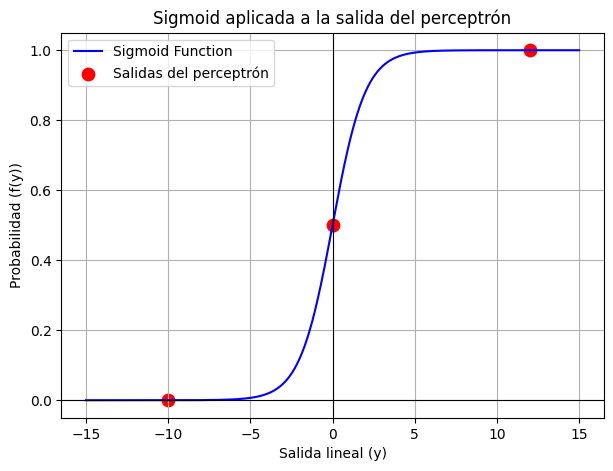

In [7]:
import matplotlib.pyplot as plt


# === Curva de la función Sigmoid ===
x_plot = torch.linspace(-15, 15, 400)
y_plot = 1 / (1 + torch.exp(-x_plot))  # f(y) = 1 / (1 + e^-y)

# === Tus valores (resultado del perceptrón) ===
y_sigmoid = 1 / (1 + torch.exp(-y))  # salida de la activación sigmoid

plt.figure(figsize=(7, 5))
plt.plot(x_plot.cpu(), y_plot.cpu(), label="Sigmoid Function", color="blue")
plt.scatter(y.cpu(), y_sigmoid.cpu(), color="red", s=80, label="Salidas del perceptrón")

plt.title("Sigmoid aplicada a la salida del perceptrón")
plt.xlabel("Salida lineal (y)")
plt.ylabel("Probabilidad (f(y))")
plt.grid(True)
plt.axhline(0, color="black", linewidth=0.8)
plt.axvline(0, color="black", linewidth=0.8)
plt.legend()
plt.show()


Vemos que la derivada de la sigmoide se parece a una campana de gauss.
Solo las neuronas con valores de entrada cerca de 0 aprenden
Las neuronas muy activadas o desactivadas (valores grandes o muy negativos) tienen gradiente 0, así que dejan de actualizarse.

Por eso, aunque la Sigmoid, se usa hoy solo en la salida, no en las capas internas.

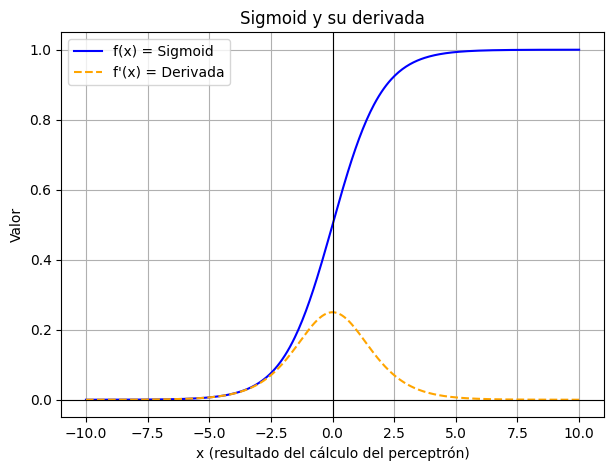

In [8]:
# === Dominio ===
x_plot = torch.linspace(-10, 10, 400)

# === Sigmoid ===
y_plot = 1 / (1 + torch.exp(-x_plot))

# === Derivada de la Sigmoid ===
# f'(x) = f(x) * (1 - f(x))
dy_dx = y_plot * (1 - y_plot)

# === Gráfica ===
plt.figure(figsize=(7, 5))
plt.plot(x_plot.cpu(), y_plot.cpu(), label="f(x) = Sigmoid", color="blue")
plt.plot(x_plot.cpu(), dy_dx.cpu(), "--", label="f'(x) = Derivada", color="orange")

plt.title("Sigmoid y su derivada")
plt.xlabel("x (resultado del cálculo del perceptrón)")
plt.ylabel("Valor")
plt.grid(True)
plt.axhline(0, color="black", linewidth=0.8)
plt.axvline(0, color="black", linewidth=0.8)
plt.legend()
plt.show()